In [1]:
import numpy as np
from lattice import lattice_2D
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import normalize
from LLGS_simulation import LLGS_Simulation_2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import glob
plt.style.use('dark_background')

In [2]:
problem_name = "anisotropy"
simple_cubic = lattice_2D(1,10,8)
simple_cubic.set_position(
    r_a = np.array([1,0]),
    r_b = np.array([0,1]),
    r_site = np.array((
    [0,0] #first site
    ))
)

(-0.45, 9.45, -0.35000000000000003, 7.35)

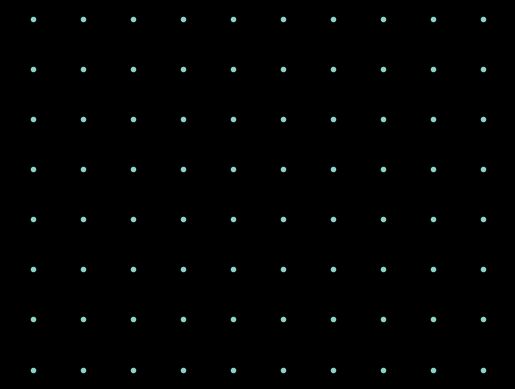

In [3]:
structure = simple_cubic.get_positions()

plt.plot(structure[:,0],structure[:,1],'.')
plt.axis('equal')
plt.axis('off')

In [4]:
def initialRandomSpin(lattice:lattice_2D):
    """
        Initial particles
    """
    N=lattice.N
    sx=np.random.normal(0,1,N)
    sy=np.random.normal(0,1,N)
    sz=np.random.normal(0,1,N)
    spins = np.transpose(np.vstack((sx,sy,sz)))
    spins_normalized = normalize(spins)

    lattice.set_spins(spins_normalized)
    return lattice

In [5]:
initialRandomSpin(simple_cubic)

In [8]:
method = "Euler"
dt=0.001
sim = LLGS_Simulation_2D(simple_cubic)
sim.setup(H_v=5,io_title=problem_name,method=method)
sim.evolve(simple_cubic,dt=dt,tmax=0.5)

simulation is done


<Figure size 640x480 with 0 Axes>

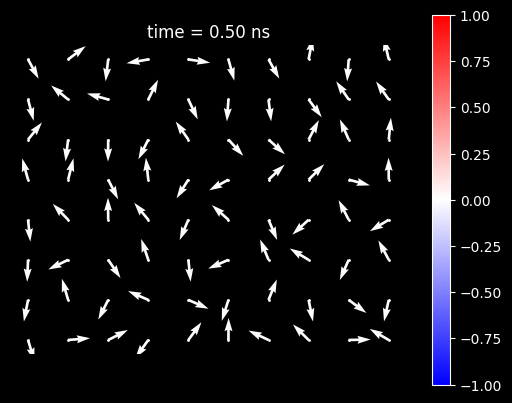

In [9]:
plt.style.use("dark_background")
plt.set_cmap('bwr')

fig, ax =plt.subplots()
#fig.set_size_inches(20, 20, forward=True)
#fig.set_dpi(72)
line = ax.plot([],[])

cmap = plt.get_cmap("bwr")
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm,ax=ax)

def init():
    fn_structure = "data_"+problem_name+"/structure.txt"
    site,a,b,x,y = np.transpose(np.loadtxt(fn_structure))
    ax.plot(x,y,'w.',markersize=2)

    return line

def updateLattice(frame):
    fn_structure = "data_"+problem_name+"/structure.txt"
    fn = fns[frame]
    sx,sy,sz = np.transpose(np.loadtxt(fn))
    site,a,b,x,y = np.transpose(np.loadtxt(fn_structure))

    arrowscale=0.3
    ax.clear()
    ax.plot(x,y,'w.',markersize=2)
    ax.quiver(x,y,sx*arrowscale,sy*arrowscale,sz,norm=norm)
    ax.set_aspect('equal')
    ax.axis("off")
    plt.title(f"time = {(frame*dt):0.2f} ns")

    return line


fns = "data_"+problem_name+"/"+method+"_[0-9][0-9][0-9][0-9][0-9].txt"
fns = glob.glob(fns)
fns.sort()
ani = animation.FuncAnimation(fig, updateLattice, frames=len(fns),init_func=init, blit=True)
ani.save('movie_'+problem_name+'.mp4',fps=10)